# Homework 3
Oscar Sjöstrand

### EDA
WE begine the Exploratory Data Analysis by plotting scatterplots of the width of the petal and sepals, aswell as the length of them. To achive this we use the libraries matplotlib.pyplot and seaborn. We also use pandas to read the csv-file.

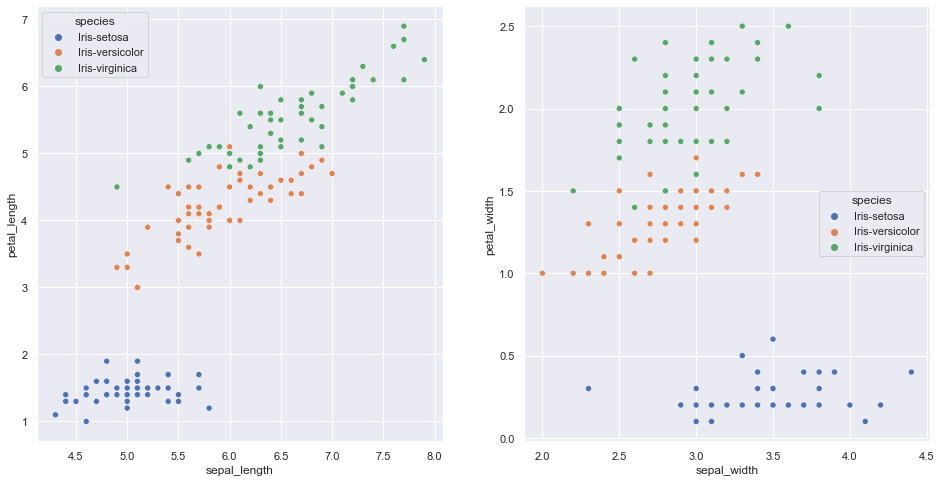

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

Iris = pd.read_csv("IRIS.csv")

sl = Iris["sepal_length"]
sw = Iris["sepal_width"]
pl = Iris["petal_length"]
pw = Iris["petal_width"]
species = Iris["species"]

plt.figure(figsize= (16,8))

plt.subplot(1, 2, 1)
sns.scatterplot(x = sl, y = pl, hue = species)

plt.subplot(1, 2, 2)
sns.scatterplot(x = sw, y = pw, hue = species)

plt.show()

If we look at the fist plot which shows the relation between petal and sepal length, we see that low sepal length correlates with low petal length and vice versa. However, when looking at the second plot which shows the relation between petal and sepal width, we can not draw the same conclusion.

We can show the dimensions of the different species of plants by ploting boxplots of the different dimensions.

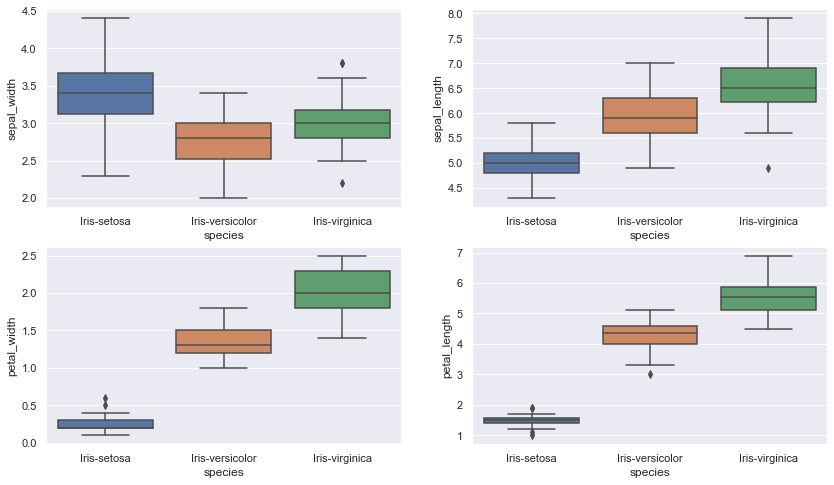

In [3]:
plt.figure(figsize= (14,8), )

plt.subplot(2, 2, 1)
sns.boxplot(x = species, y = sw)

plt.subplot(2, 2, 2)
sns.boxplot(x = species, y = sl)

plt.subplot(2, 2, 3)
sns.boxplot(x = species, y = pw)

plt.subplot(2, 2, 4)
sns.boxplot(x = species, y = pl)

plt.show()

Let us begin with sepal width. Iris-setosa tends to have a higher median sepal width compared to the other two species. Iris-versicolor has a lower sepal width distribution compared to Iris-virginica. There is some overlap in the sepal width ranges between Iris-versicolor and Iris-virginica, but Iris-setosa stands out distinctly. 

When studying sepal length we see that, Iris-virginica has the highest median sepal length, followed by Iris-versicolor, while Iris-setosa has the shortest sepal length. There is some overlap between Iris-versicolor and Iris-virginica, but Iris-setosa has a clearly separate distribution.

If we look at petal width we see that, Iris-setosa has significantly smaller petal widths compared to the other two species, with almost no overlap. Iris-virginica has the largest petal widths, and Iris-versicolor falls in between. The distinction between Iris-setosa and the other two species is quite pronounced.

Petal length is similar to petal width sicne Iris-setosa has significantly smaller petal lenghts, creating a clear distinction. Iris-virginica shows the largest petal lengths, followed by Iris-versicolor, with some overlap between the latter two.

To conclude we see that Iris-setosa is well-separated from the other species in terms of both petal length and petal width. These features could be strong predictors for distinguishing Iris-setosa. There is some overlap between Iris-versicolor and Iris-virginica, particularly in sepal dimensions, but petal dimensions provide better separation.

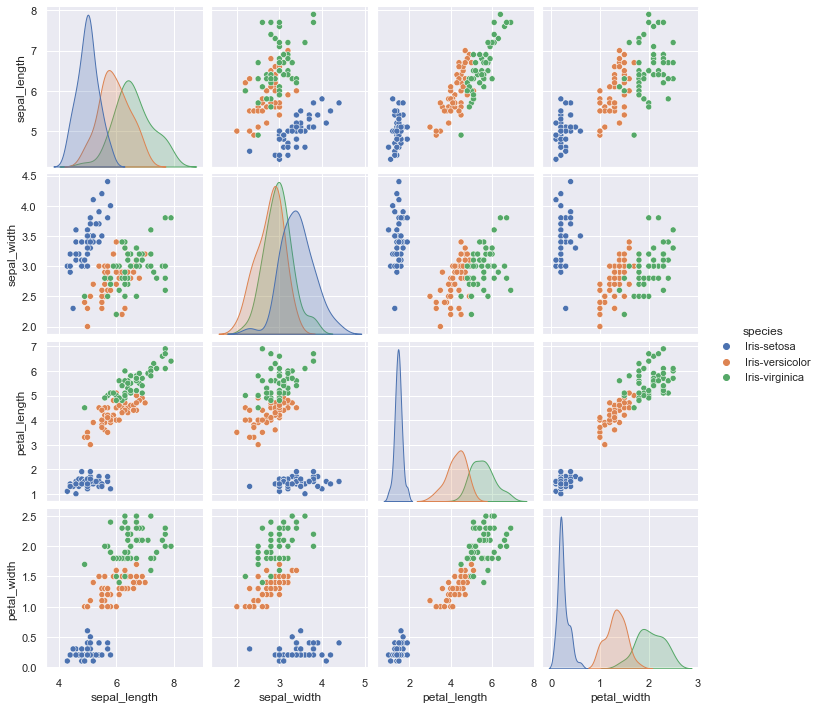

In [6]:
Iris['species'] = Iris['species'].astype('category')
sns.pairplot(Iris, diag_kind = "kde", hue = "species")
plt.show()

Let us start by looking at the diagonals, which show the distribution of the three species. There is a lot of overlap when looking at sepal length and width. However, petal length and width show us that Iris-setosa is distinctly smaller than both Iris-versicolor and Iris-virginica and Iris-virginica has, on avrage larger petals than Iris-versicolor. 

Let us look at the plots under the diagonal. we cant realy say much about the relation between sepal length and sepal width. Sepal length and petal length has an appriximate linear relation where smaller values of sepal length relates to smaller values of petal length. We can draw the same conclusion about the relation between sepal length and petal width. We can not draw any new conclusions by looking at sepal width and petal length and width. We can also see a linear relation between petal length and width. 

### Birdwatching

In [7]:
art_port = pd.read_csv("artportalen.csv")

art_port['Antal'] = pd.to_numeric(art_port['Antal'], errors='coerce')

species_count = art_port.groupby("Artnamn")["Antal"].sum()

most_prevalent_species = species_count.nlargest(3)

most_prevalent_species

Artnamn
Grönsiska    20211.0
Sothöna       8308.0
Gräsand       7167.0
Name: Antal, dtype: float64

<AxesSubplot: xlabel='Month', ylabel='Count'>

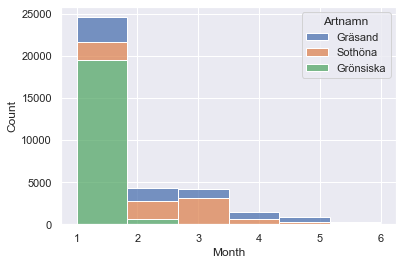

In [8]:
art_port['Startdatum'] = pd.to_datetime(art_port['Startdatum'])
art_port['Month'] = art_port['Startdatum'].dt.month

top_3 = ["Grönsiska", "Sothöna", "Gräsand"]

sub = art_port[art_port["Artnamn"].isin(top_3)]

sns.histplot(data = sub, x = "Month", bins = 6, weights = "Antal", hue='Artnamn', multiple='stack', kde = False)

In [9]:
rarest_species = species_count.nsmallest(20)
print(rarest_species)

Artnamn
Ob. korsnäbb                 0.0
Bivråk                       1.0
Bändelkorsnäbb               1.0
Ejder                        1.0
Fjällvråk                    1.0
Forsärla                     1.0
Gravand                      1.0
Lappsparv                    1.0
Ormvråk, underarten buteo    1.0
Rosenfink                    1.0
Röd glada                    1.0
Rödbena                      1.0
Spillkråka                   1.0
Storlom                      1.0
Strömstare                   1.0
Tornfalk                     1.0
Trädlärka                    1.0
Varfågel                     1.0
Vinterhämpling               1.0
Ägretthäger                  1.0
Name: Antal, dtype: float64


I include the 20 rarest bird species since Ob. korsnäbb had zero sightings and cant be included. So it is a tie between the 19 species that had only one observation. 

### Own questions
* Which month has the most observations?
* How many redlisted species where observed?
* Which person reported the most birds?

Let us start by looking at a histogram of the number of observations in which month. 

<AxesSubplot: xlabel='Month', ylabel='Count'>

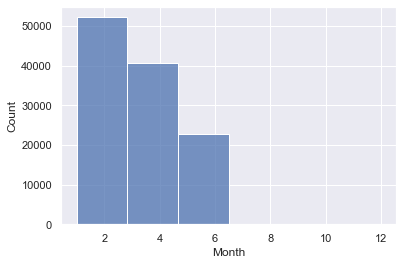

In [9]:
sns.histplot(data = art_port, x = "Month", bins = 6, weights = "Antal", kde = False)

We see that most of the observations is is made in january.

To find the number of observation of redlisted species we remove all rows with missing data in the "Rödlistade" column, we add all observations so we get a dataframe with the name of the species and the number of observations. Finally we check the number of rows.

In [10]:
redlist = art_port.dropna(subset= ["Rödlistade"])
redlist_count = redlist.groupby("Artnamn")["Antal"].sum()
print(len(redlist_count))

45


We see that there were observations of 45 redlisted species.

In [11]:
person_count = art_port.groupby("Rapportör")["Antal"].sum()
person_count.idxmax()

'Svante Söderholm'

The person who reported the most birds was Svante Söderholm with 50079 birds.

### Predicting Strokes

In [16]:
strokes = pd.read_csv("stroke-data.csv")
strokes

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


The dataset built by observations of stroke victims and some relevant information about the patient. The data set is quite large and include most of the data, not alot of Nan in the dataset. Hopefully, we can use the information about the patient to draw conclusion why they had a stroke.

1. Does heart disease and hypertension predict strokes in young adults (18-25)?

In [13]:
strokes = strokes.sort_values(by="age")
young_adult_strokes = strokes[(strokes["age"] >= 18) & (strokes["age"] <= 25)]
num_hypertension = young_adult_strokes["hypertension"].sum()
num_hd = young_adult_strokes["heart_disease"].sum()
print(len(young_adult_strokes), num_hypertension, num_hd)

437 5 0


Out of 437 cases of strokes in young adults only 5 people had hypertensoin and 0 had heart disease.

2. How does the occurece of strokes range over BMI?

<AxesSubplot: xlabel='bmi', ylabel='Count'>

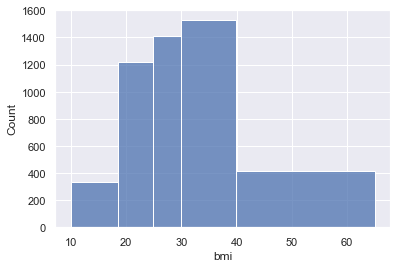

In [20]:
bmi = strokes.dropna(subset = ["bmi"])
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Morbidly Obese']
bins = [10, 18.5, 24.9, 29.9, 39.9, 65]

pd.set_option('mode.chained_assignment', None) #Removes a warning 

bmi['BMI_Category'] = pd.cut(bmi['bmi'], bins=bins, labels=labels)

sns.histplot(data=bmi, x='bmi', multiple='stack', bins=bins)

We begin by removing the missing values using the dropna() funciton. Then we define the different ranges of BMI. Finally we plot a histogram over the ranges of BMI. We see that most of the strokes occur in in the obese range between 29.9 and 39.9. 

3. Is there a difference in smoking between the genders in the stroke victims?

We begin by looking at the smokers and formaly smokers.

In [21]:
smoking_status = strokes['smoking_status'].unique()
drop_index = strokes[strokes['smoking_status'].isin(['never smoked', 'Unknown'])].index

smoker_strokes = strokes.drop(drop_index)
gender_count = smoker_strokes['gender'].value_counts()
gender_count

Female    929
Male      744
Other       1
Name: gender, dtype: int64

From the website we see that 59 percent of the victims were female but only 56 percent of the smokers were female. This gives us and argument but not conformation that there are more male smokers.

### Data Preparation

In [22]:
cell_phones = pd.read_csv("cell_phones_total.csv")

We begin by trying to understand the nature of the missing data. If we look at the years where data is missing we see that before 1975 there are alot of missing data. This is in the early years of cellphone useage and perhaps it was hard for the institute or company to collect data. When observing the data before 1980 we see that even the reported values are 0 so we remove all columns before 1980. We also drop all rows which do not hava any data.

In [23]:
cell_phones = cell_phones.drop(columns =[col for col in cell_phones.columns[1:] if 1960 <= int(col) <= 1979])
cell_phones = cell_phones.dropna(how="all")

Let us remove the countries missing more than a quarter of the values. 

In [24]:
cell_phones = cell_phones.dropna(thresh = 30)

Now let us convert the values from strings to integers.

In [25]:
def convert_data(val):
    if pd.isna(val):
        return val
    elif val.endswith('K') or val.endswith('k'):
        return float(val[:-1]) * 1_000
    elif val.endswith('M') or val.endswith('m'):
        return float(val[:-1]) * 1_000_000
    elif val.endswith('B') or val.endswith('b'):
        return float(val[:-1]) * 1_000_000_000
    else:
        return float(val)

cell_phones.iloc[:, 1:] = cell_phones.iloc[:, 1:].applymap(convert_data)

We now want to interpolate the missing values. We use interpolation since the number of phones is increasing and the missing data seems to be random and we can fill the gap.

In [26]:
cell_phones.set_index('iso-3', inplace=True)
cell_phones = cell_phones.apply(pd.to_numeric)
interpolated_df = cell_phones.interpolate(method='linear', axis = 1)
pd.set_option('display.float_format', '{:.1e}'.format)
interpolated_df

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
iso-3,,,,,,,,,,,,,,,,,,,,,
ABW,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,...,1.3e+05,1.3e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05,1.4e+05
AFG,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,...,1.0e+07,1.4e+07,1.5e+07,1.7e+07,1.8e+07,2.0e+07,2.2e+07,2.4e+07,2.2e+07,2.3e+07
AGO,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,...,9.4e+06,1.2e+07,1.3e+07,1.3e+07,1.4e+07,1.4e+07,1.3e+07,1.3e+07,1.3e+07,1.5e+07
ALB,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,...,2.7e+06,3.1e+06,3.5e+06,3.7e+06,3.4e+06,3.4e+06,3.4e+06,3.6e+06,2.7e+06,2.6e+06
AND,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,...,6.6e+04,6.5e+04,6.4e+04,6.4e+04,6.6e+04,7.1e+04,7.6e+04,8.0e+04,8.3e+04,8.8e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,...,9.0e+04,9.5e+04,1.0e+05,1.0e+05,1.1e+05,1.2e+05,1.5e+05,1.2e+05,1.2e+05,1.2e+05
YEM,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,...,1.1e+07,1.2e+07,1.4e+07,1.7e+07,1.7e+07,1.5e+07,1.6e+07,1.5e+07,1.5e+07,1.5e+07
ZAF,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,0.0e+00,4.0e+03,...,5.0e+07,6.4e+07,6.8e+07,7.7e+07,7.9e+07,8.8e+07,8.2e+07,8.8e+07,9.2e+07,9.7e+07


In [ ]:
Now we have clean data.